<div style="font-family: 'Poppins'; font-weight: bold; letter-spacing: 0px; color: #FFFFFF; font-size: 300%; text-align: left; padding: 15px; background: #0A0F29; border: 8px solid #00FFFF; border-radius: 15px; box-shadow: 5px 5px 20px rgba(0, 0, 0, 0.5);">
    Neo Bank churn -XGBoost<br>
</div>

# <div style="background-color:#0A0F29; font-family:'Poppins', cursive; color:#E0F7FA; font-size:140%; text-align:center; border: 2px solid #00FFFF; border-radius:15px; padding: 15px; box-shadow: 5px 5px 20px rgba(0, 0, 0, 0.5); font-weight: bold; letter-spacing: 1px; text-transform: uppercase;">Notebook aims</div>

I am experimenting with using an LLM to automate my workflow in this notebook. I started with [Thomas Meißner](https://www.kaggle.com/thomasmeiner)'s [notebook](https://www.kaggle.com/code/thomasmeiner/neo-bank-churn-isolation-forest-example) and provided a series of instructions to GPT and Claude 3.5 to modify the code.

I swapped the model for XGBoost and changed my initial metric from ROC-AUC to PR-AUC to better handle class imbalance.

This approach is not perfect, as you have to selectively decide what to keep or discard from the LLM’s suggestions. For example, while it may often recommend using SMOTE to address class imbalance, this method is not [always optimal](https://www.linkedin.com/posts/soledad-galli_no-smote-is-not-the-silver-bullet-for-activity-7094995959624929281-EYmH/).

This is a work in progress and the model is performing poorly so far on the minority class. 

# <div style="background-color:#0A0F29; font-family:'Poppins', cursive; color:#E0F7FA; font-size:140%; text-align:center; border: 2px solid #00FFFF; border-radius:15px; padding: 15px; box-shadow: 5px 5px 20px rgba(0, 0, 0, 0.5); font-weight: bold; letter-spacing: 1px; text-transform: uppercase;">Define the target</div>

- **Model claude 3.5**
- **Prompt: competition description + dataset head and describe functions output**

## Churn Prediction Strategy for Neo-Bank Dataset

### Churn Definition Strategy

Since this is a neo-bank, the focus is on transaction activity patterns. To identify churn, multiple indicators should be considered:

- **`Transaction frequency drops`**
- **`Transaction volumes decrease`**
- **`Account dormancy periods`**
- **`Support interactions (complaints, CSAT scores)`**
- **`Crypto activity changes`**

### Proposed Churn Definition Components

#### Primary Indicators
- **`No transactions (in/out) for X consecutive days`**
- **`Significant drop in transaction volume (e.g., >50% below 3-month average)`**
- **`Complete cessation of previously regular activity types (e.g., crypto trading)`**

### Implementation Steps

#### Churn Detection Implementation

##### Feature Engineering Ideas
- Rolling statistics for transaction patterns
- Customer segmentation based on usage patterns
- Engagement metrics from touchpoints data
- CSAT trend analysis
- Seasonality indicators
- Customer lifecycle stage indicators

##### Modeling Approach
- Use **XGBoost** as a single model architecture (interpretable via SHAP values)
- Implement cross-validation with **time-based splits**
- Consider separate models for different customer segments
- Use model orchestration based on customer segments/behavior patterns

# <div style="background-color:#0A0F29; font-family:'Poppins', cursive; color:#E0F7FA; font-size:140%; text-align:center; border: 2px solid #00FFFF; border-radius:15px; padding: 15px; box-shadow: 5px 5px 20px rgba(0, 0, 0, 0.5); font-weight: bold; letter-spacing: 1px; text-transform: uppercase;">Predict churn due to Fraud</div>

- Churn due to fraud is one of the events we can predict, although it is not the main aim of the competition.
- Class imbalance makes it challenging to predict.

,Id,customer_id,interest_rate,name,country,date_of_birth,address,date,atm_transfer_in,atm_transfer_out,...,bank_transfer_out_volume,crypto_in_volume,crypto_out_volume,complaints,touchpoints,csat_scores,tenure,from_competitor,job,churn_due_to_fraud
0,1,1,3.5,Yolanda Parker,Lithuania,1954-07-10,"1929 Erin Lights Suite 709\nLake Michaelburgh,...",2008-01-17,0,0,...,5844.193394,393.145010,220.900654,0,[],"{'appointment': None, 'email': None, 'phone': ...",0,False,Amenity horticulturist,False
1,6,1,3.5,Yolanda Parker,Lithuania,1954-07-10,"1929 Erin Lights Suite 709\nLake Michaelburgh,...",2008-01-18,0,0,...,4986.370246,390.005729,221.147296,0,[],"{'appointment': None, 'email': None, 'phone': ...",1,False,Amenity horticulturist,False
2,16,1,3.5,Yolanda Parker,Lithuania,1954-07-10,"1929 Erin Lights Suite 709\nLake Michaelburgh,...",2008-01-19,0,0,...,7451.373471,393.209108,260.510535,0,[],"{'appointment': None, 'email': None, 'phone': ...",2,False,Amenity horticulturist,False
3,31,1,3.5,Yolanda Parker,Lithuania,1954-07-10,"1929 Erin Lights Suite 709\nLake Michaelburgh,...",2008-01-20,0,0,...,6548.352211,394.078294,203.214128,0,[],"{'appointment': None, 'email': None, 'phone': ...",3,False,Amenity horticulturist,False
4,50,1,3.5,Yolanda Parker,Lithuania,1954-07-10,"1929 Erin Lights Suite 709\nLake Michaelburgh,...",2008-01-21,0,0,...,6129.342716,395.174604,207.894467,0,"[whatsapp, email, email]","{'appointment': None, 'email': None, 'phone': ...",4,False,Amenity horticulturist,False


,Id,customer_id,interest_rate,date,atm_transfer_in,atm_transfer_out,bank_transfer_in,bank_transfer_out,crypto_in,crypto_out,bank_transfer_in_volume,bank_transfer_out_volume,crypto_in_volume,crypto_out_volume,complaints,tenure
count,3.926058e+06,3.926058e+06,3.926058e+06,3926058,3.926058e+06,3.926058e+06,3.926058e+06,3.926058e+06,3.926058e+06,3.926058e+06,3.926058e+06,3.926058e+06,3.926058e+06,3.926058e+06,3.926058e+06,3.926058e+06
mean,2.163620e+06,2.976524e+04,5.215045e-01,2017-12-14 20:10:30.715084032,3.122723e-01,4.176703e-01,1.187016e+03,8.066435e+02,8.698449e+00,3.457330e+00,1.793399e+03,1.114901e+03,1.152860e+02,4.910356e+01,2.119454e-02,7.230339e+02
min,1.000000e+00,1.000000e+00,0.000000e+00,2008-01-17 00:00:00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.523653e+01,7.466923e+00,3.156925e+00,1.301211e+00,0.000000e+00,0.000000e+00
25%,1.084868e+06,8.906000e+03,0.000000e+00,2014-12-28 00:00:00,0.000000e+00,0.000000e+00,2.000000e+00,2.000000e+00,1.000000e+00,1.000000e+00,9.121113e+01,2.586801e+01,4.347029e+01,1.300000e+01,0.000000e+00,2.300000e+01
50%,2.167208e+06,2.162400e+04,0.000000e+00,2018-09-12 00:00:00,0.000000e+00,0.000000e+00,1.000000e+02,2.000000e+00,1.000000e+00,1.000000e+00,7.938060e+02,5.371336e+01,5.257009e+01,1.630533e+01,0.000000e+00,4.180000e+02
75%,3.243858e+06,4.512700e+04,0.000000e+00,2021-04-29 00:00:00,0.000000e+00,0.000000e+00,5.360000e+02,7.000000e+00,6.000000e+00,6.000000e+00,1.124250e+03,1.251570e+02,1.145416e+02,2.156960e+01,0.000000e+00,1.127000e+03
max,4.312994e+06,1.061860e+05,3.500000e+00,2023-12-31 00:00:00,2.325000e+03,2.497000e+03,3.420900e+04,1.946400e+04,8.300000e+01,7.800000e+01,3.952846e+04,3.482661e+04,2.035283e+03,1.214428e+03,3.000000e+00,5.821000e+03
std,1.245626e+06,2.592516e+04,1.042869e+00,NaN,1.944808e+01,2.353970e+01,2.774190e+03,2.083132e+03,1.684463e+01,4.419363e+00,3.123795e+03,2.746087e+03,1.632037e+02,9.148923e+01,2.195110e-01,8.346001e+02


Best Parameters: {'subsample': 1.0, 'scale_pos_weight': 40.0, 'reg_lambda': 0.1, 'reg_alpha': 1, 'n_estimators': 900, 'min_child_weight': 1, 'max_depth': 9, 'learning_rate': 0.1, 'gamma': 0.1, 'colsample_bytree': 0.7}
Stratified CV Average Precision (PR-AUC): 0.964924804342845
[0]	validation_0-logloss:1.20749	validation_1-logloss:1.30420
[1]	validation_0-logloss:1.06670	validation_1-logloss:1.15392
[2]	validation_0-logloss:0.94823	validation_1-logloss:1.02735
[3]	validation_0-logloss:0.87343	validation_1-logloss:0.94810
[4]	validation_0-logloss:0.79723	validation_1-logloss:0.86653
[5]	validation_0-logloss:0.71595	validation_1-logloss:0.77894
[6]	validation_0-logloss:0.69889	validation_1-logloss:0.76135
[7]	validation_0-logloss:0.63724	validation_1-logloss:0.69539
[8]	validation_0-logloss:0.58784	validation_1-logloss:0.64293
[9]	validation_0-logloss:0.53461	validation_1-logloss:0.58510
[10]	validation_0-logloss:0.49083	validation_1-logloss:0.53859
[11]	validation_0-logloss:0.48242	valid

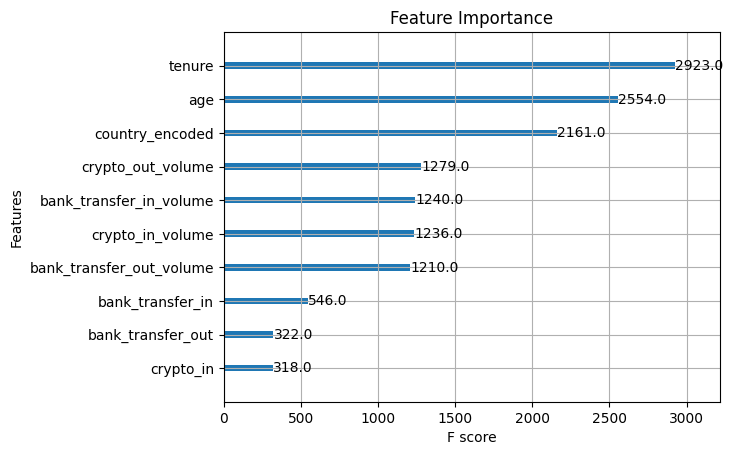

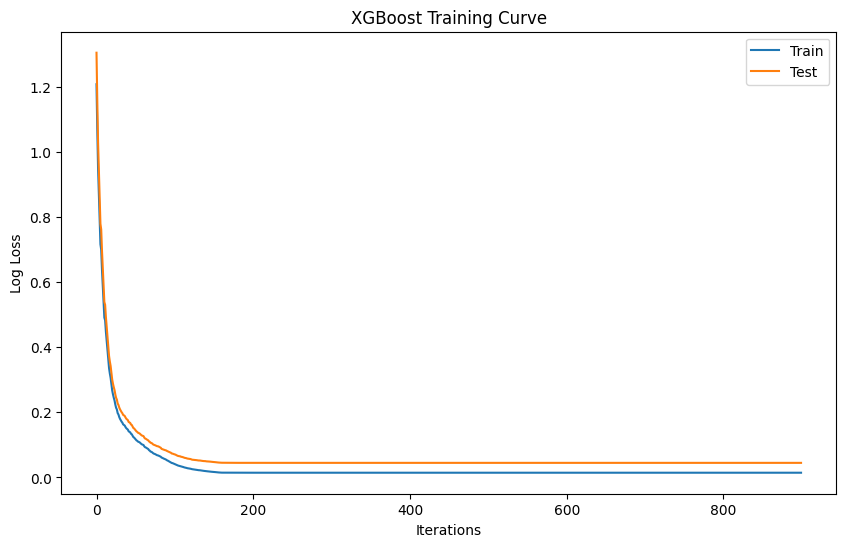

Average Precision (PR-AUC): 0.44887005885897546


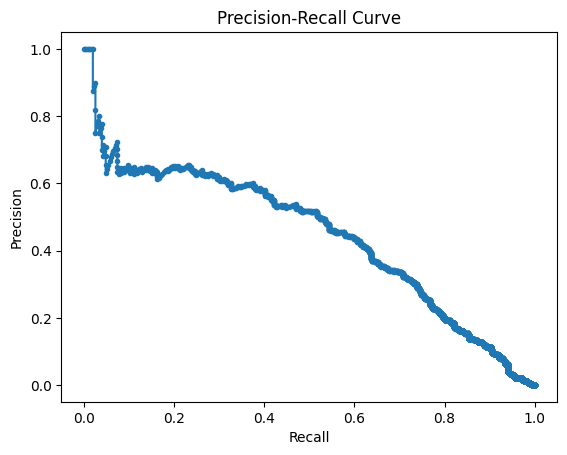

Optimal Threshold: 0.9958536624908447


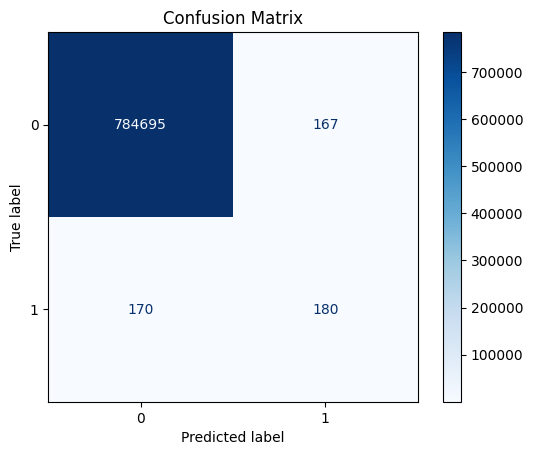


Adjusted Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    784862
           1       0.52      0.51      0.52       350

    accuracy                           1.00    785212
   macro avg       0.76      0.76      0.76    785212
weighted avg       1.00      1.00      1.00    785212



In [1]:
TRIALS = 50000

import pandas as pd
import glob
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, average_precision_score, precision_recall_curve, confusion_matrix, ConfusionMatrixDisplay
import xgboost as xgb
import matplotlib.pyplot as plt
import numpy as np

# Load all parquet files into a single DataFrame
file_pattern = '/kaggle/input/neo-bank-non-sub-churn-prediction/train_*.parquet' 
all_files = glob.glob(file_pattern)
df = pd.concat([pd.read_parquet(file) for file in all_files], ignore_index=True)

# Display data for verification (optional)
display(df.head())

# Display descriptive statistics of the DataFrame (optional)
display(df.describe())

# Feature Engineering for Training Data
df['date_of_birth'] = pd.to_datetime(df['date_of_birth'], errors='coerce')
df['age'] = ((pd.Timestamp.now() - df['date_of_birth']).dt.days / 365).fillna(0).astype(int)

# Encode country using Label Encoding
df['country'] = df['country'].fillna('unknown')
label_encoder = LabelEncoder()
df['country_encoded'] = label_encoder.fit_transform(df['country'])

# Feature selection
use_cols = [
    "bank_transfer_in", "bank_transfer_out", "crypto_in_volume", "crypto_out_volume",
    "tenure", "complaints", "age", "country_encoded", "bank_transfer_in_volume",
    "bank_transfer_out_volume", "crypto_in", "crypto_out", "atm_transfer_in", 
    "atm_transfer_out", "from_competitor"
]

# Handling missing values and preparing the features and target
X = df[use_cols].fillna(0)
y = df['churn_due_to_fraud'].astype(int)

# Splitting data into train and test sets with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Downsampling the majority class so that its size is no more than 10 times the minority class
majority_class = X_train[y_train == 0]
minority_class = X_train[y_train == 1]
majority_downsampled = majority_class.sample(n=min(len(minority_class) * 10, len(majority_class)), random_state=42)
X_train_balanced = pd.concat([majority_downsampled, minority_class])
y_train_balanced = pd.concat([pd.Series([0] * len(majority_downsampled)), pd.Series([1] * len(minority_class))])

# Shuffle the balanced dataset
X_train_balanced, y_train_balanced = X_train_balanced.sample(frac=1, random_state=42), y_train_balanced.sample(frac=1, random_state=42)

# Calculate scale_pos_weight based on the downsampled dataset
scale_pos_weight = len(y_train_balanced[y_train_balanced == 0]) / len(y_train_balanced[y_train_balanced == 1])

# Define the hyperparameter grid for RandomizedSearchCV
param_grid = {
    'n_estimators': [50, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000],
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
    'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 12],
    'subsample': [0.25, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3, 0.4, 0.5, 1.0],
    'min_child_weight': [1, 2, 3, 4, 5, 6, 7],
    'scale_pos_weight': [scale_pos_weight, scale_pos_weight * 0.5, scale_pos_weight * 2,  scale_pos_weight * 4],
    'reg_alpha': [0, 0.01, 0.1, 1, 10],
    'reg_lambda': [0, 0.01, 0.1, 1, 10]
}

# Initialize the XGBoost classifier
xgb_model = xgb.XGBClassifier(
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss',
    scale_pos_weight=scale_pos_weight
)

# Perform RandomizedSearchCV to find the best hyperparameters
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_grid,
    n_iter=TRIALS,
    scoring='average_precision',
    cv=2,
    verbose=0,
    random_state=42,
    n_jobs=-1
)
random_search.fit(X_train_balanced, y_train_balanced)

# Display the best parameters found
print("Best Parameters:", random_search.best_params_)

# Use the best estimator for final model training
best_xgb_model = random_search.best_estimator_

# Stratified K-Fold Cross-Validation for final training and evaluation
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = []
for train_index, val_index in stratified_kfold.split(X_train_balanced, y_train_balanced):
    X_train_fold, X_val_fold = X_train_balanced.iloc[train_index], X_train_balanced.iloc[val_index]
    y_train_fold, y_val_fold = y_train_balanced.iloc[train_index], y_train_balanced.iloc[val_index]
    best_xgb_model.fit(X_train_fold, y_train_fold, eval_set=[(X_val_fold, y_val_fold)], verbose=False)
    y_proba_val = best_xgb_model.predict_proba(X_val_fold)[:, 1]
    average_precision = average_precision_score(y_val_fold, y_proba_val)
    scores.append(average_precision)
print("Stratified CV Average Precision (PR-AUC):", np.mean(scores))

# Fit the model on the entire balanced training set
best_xgb_model.fit(
    X_train_balanced, 
    y_train_balanced, 
    eval_set=[(X_train_balanced, y_train_balanced), (X_test, y_test)], 
    verbose=True
)

# Plot feature importance
xgb.plot_importance(best_xgb_model, importance_type='weight', max_num_features=10)
plt.title("Feature Importance")
plt.show()

# Plot training curve (diagnostic for overfitting)
results = best_xgb_model.evals_result()
plt.figure(figsize=(10, 6))
plt.plot(results['validation_0']['logloss'], label='Train')
plt.plot(results['validation_1']['logloss'], label='Test')
plt.xlabel('Iterations')
plt.ylabel('Log Loss')
plt.title('XGBoost Training Curve')
plt.legend()
plt.show()

# Make predictions on the test set
y_proba = best_xgb_model.predict_proba(X_test)[:, 1]

# Evaluate model performance using PR-AUC
average_precision = average_precision_score(y_test, y_proba)
print("Average Precision (PR-AUC):", average_precision)

# Generate a Precision-Recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_proba)
plt.figure()
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

# Apply the optimal threshold for predictions
optimal_threshold = thresholds[np.argmax(precision * recall)]
print(f"Optimal Threshold: {optimal_threshold}")
y_pred_adjusted = (y_proba >= optimal_threshold).astype(int)

# Calculate confusion matrix and display
cm = confusion_matrix(y_test, y_pred_adjusted)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

print("\nAdjusted Classification Report:\n", classification_report(y_test, y_pred_adjusted))